In [201]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [202]:
df = pd.read_csv('Improving Employee Retention by Predicting Employee Attrition Using Machine Learning - hr_data.csv')

## Quick Look & Data Preprocessing

Tahapan Pengerjaan
1. Download file Dataset (done)
2. Mengatasi data null (Hint: Perhatikan jumlah data null dan tipe dari setiap kolom, untuk memilih metode yang tepat sesuai dengan skala ukur pada data) (done)
3. Mengganti value yang tidak sesuai (Hint: Perhatikan kolom "PernahBekerja") (done)
4. Membuang data yang tidak diperlukan (Hint: Cari dan buang kolom yang memiliki satu unique value (konstanta)) (done)

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

In [204]:
df.isnull().sum()

Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               3
JumlahKeterlambatanSebulanTerakhir      1
JumlahKetidakhadiran                    6
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
PernahBekerja                           0
IkutProgramLOP                        258
AlasanResign                           66
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan          

columns that have null data
1. 'SkorKepuasanPegawai'
2. 'JumlahKeikutsertaanProjek'
3. 'JumlahKeterlambatanSebulanTerakhir'
4. 'JumlahKetidakhadiran'
5. 'IkutProgramLOP'
6. 'AlasanResign'



In [205]:
# columns grouping
nums = ['SkorSurveyEngagement','SkorKepuasanPegawai','JumlahKeikutsertaanProjek','JumlahKeterlambatanSebulanTerakhir','JumlahKetidakhadiran','IkutProgramLOP']
cats = ['StatusPernikahan','JenisKelamin','Pekerjaan','JenjangKarir','PerformancePegawai','AsalDaerah','HiringPlatform','TingkatPendidikan','AlasanResign','PernahBekerja']
date_time = ['TanggalLahir','TanggalHiring','TanggalPenilaianKaryawan','TanggalResign']
constant = ['Username','EnterpriseID','NomorHP','Email']

In [206]:
constant = ['Username','EnterpriseID','NomorHP','Email']
df['Username'].value_counts()

Username
boredEggs0           2
brainyMagpie7        2
spiritedPorpoise3    1
grudgingMeerkat3     1
boastfulSyrup4       1
                    ..
lazyPorpoise0        1
brainyFish3          1
sincereSeafowl4      1
jumpyTomatoe4        1
puzzledFish5         1
Name: count, Length: 285, dtype: int64

- for unique columns, supposed that 'constant' is a list of constant. Upon checking, there are 2 username which were used twice with different people. As such, no need to change as the column will be dropped.

In [207]:
boredEggs0 = df[(df['Username'] == 'boredEggs0')]
boredEggs0

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
158,boredEggs0,100326,Bercerai,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,Diversity_Job_Fair,...,+6283854646xxx,boredEggs0834@outlook.com,Sarjana,1,NaN,ganti_karir,1974-01-12,2011-01-10,2017-1-30,2016-3-31
204,boredEggs0,106285,Lainnya,Wanita,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Diversity_Job_Fair,...,+6285733263xxx,boredEggs0225@outlook.com,Sarjana,1,NaN,jam_kerja,1967-06-03,2013-04-01,2020-2-13,2014-8-19


In [208]:
brainyMagpie7 = df[(df['Username'] == 'brainyMagpie7')]
brainyMagpie7

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
80,brainyMagpie7,106620,Belum_menikah,Pria,FullTime,Software Engineer (Back End),Senior_level,Biasa,Jakarta Pusat,Indeed,...,+6281267984xxx,brainyMagpie7048@gmail.com,Doktor,1,NaN,internal_conflict,1986-09-01,2014-9-29,2020-1-18,2019-06-06
120,brainyMagpie7,101264,Bercerai,Pria,FullTime,Product Design (UI & UX),Freshgraduate_program,Kurang,Jakarta Barat,Indeed,...,+6285946196xxx,brainyMagpie7608@proton.com,Magister,1,NaN,masih_bekerja,1970-04-25,2017-02-10,2020-2-25,-


In [209]:
df.sample(5)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
96,cockyBuzzard5,110932,Menikah,Wanita,FullTime,Software Engineer (Android),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,+6289794136xxx,cockyBuzzard5324@proton.com,Sarjana,1,NaN,masih_bekerja,1966-03-17,2014-05-05,2020-1-21,-
148,unhappyPorpoise4,110481,Menikah,Wanita,FullTime,Software Engineer (Back End),Mid_level,Bagus,Jakarta Utara,Google_Search,...,+6283315810xxx,unhappyPorpoise4277@proton.com,Magister,1,NaN,masih_bekerja,1951-01-02,2014-9-29,2020-02-12,-
121,crushedLollies6,105488,Menikah,Pria,FullTime,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Pusat,Indeed,...,+6289900398xxx,crushedLollies6670@outlook.com,Magister,1,NaN,kejelasan_karir,1972-02-09,2016-09-06,2020-1-15,2016-10-31
183,aboardUnicorn8,106687,Belum_menikah,Pria,FullTime,Software Engineer (Back End),Mid_level,Bagus,Jakarta Timur,Indeed,...,+6281943118xxx,aboardUnicorn8967@outlook.com,Magister,1,NaN,masih_bekerja,1968-01-15,2006-01-09,2020-01-04,-
26,forsakenOwl1,105911,Belum_menikah,Wanita,FullTime,Software Engineer (Back End),Freshgraduate_program,Bagus,Jakarta Barat,CareerBuilder,...,+6283851827xxx,forsakenOwl1469@outlook.com,Magister,1,NaN,masih_bekerja,1972-08-27,2011-01-10,2014-1-30,-


In [210]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print(df[col].value_counts().sum())
    print()

Value count kolom StatusPernikahan:
StatusPernikahan
Belum_menikah    132
Menikah           57
Lainnya           48
Bercerai          47
-                  3
Name: count, dtype: int64
287

Value count kolom JenisKelamin:
JenisKelamin
Wanita    167
Pria      120
Name: count, dtype: int64
287

Value count kolom Pekerjaan:
Pekerjaan
Software Engineer (Back End)      109
Software Engineer (Front End)      72
Software Engineer (Android)        24
Product Design (UI & UX)           24
Product Manager                    17
Data Analyst                       16
Data Engineer                      10
Scrum Master                        3
Software Engineer (iOS)             3
DevOps Engineer                     3
Digital Product Manager             2
Machine Learning Engineer           2
Product Design (UX Researcher)      1
Software Architect                  1
Name: count, dtype: int64
287

Value count kolom JenjangKarir:
JenjangKarir
Freshgraduate_program    169
Mid_level                 70
Se

- For Status Pernikahan, retain 'lainnya' while putting those with dash into the same column.
- For HiringPlatform, 'On-line_Web_application' can be merged to website while usually it is the same thing.
- For PernahBekerja, it seems that only one 'yes' while others marked as '1'. will put all as 1 and it might be deleted as it is the same across all observation.
- For AlasanResign that has NA values, a new value 'lainnya' will be created.

### Missing Data

- all missing data is filled by median since mean would resulted in decimal.
- for 'JumlahKetidakhadiran', filled with 0 as did not participate

In [211]:
df['JumlahKeikutsertaanProjek'].fillna(df['JumlahKeikutsertaanProjek'].median(), inplace=True)
df['SkorKepuasanPegawai'].fillna(df['SkorKepuasanPegawai'].median(), inplace=True)
df['JumlahKeterlambatanSebulanTerakhir'].fillna(df['JumlahKeterlambatanSebulanTerakhir'].median(), inplace=True)
df['JumlahKetidakhadiran'].fillna(df['JumlahKetidakhadiran'].median(), inplace=True)


/var/folders/_9/tvxq38vj3t94zs4ngcgwcfq80000gn/T/ipykernel_55073/93561090.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/_9/tvxq38vj3t94zs4ngcgwcfq80000gn/T/ipykernel_55073/93561090.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[c

In [212]:
df['IkutProgramLOP'].fillna(0, inplace=True)
df['AlasanResign'].fillna('lainnya', inplace=True)

/var/folders/_9/tvxq38vj3t94zs4ngcgwcfq80000gn/T/ipykernel_55073/2172845048.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/_9/tvxq38vj3t94zs4ngcgwcfq80000gn/T/ipykernel_55073/2172845048.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

### Irrelevant Values

In [213]:
df['StatusPernikahan'] = df['StatusPernikahan'].apply(lambda x: 'Lainnya' if x == '-' else x)
df['HiringPlatform'] = df['HiringPlatform'].apply(lambda x: 'Website' if x == 'On-line_Web_application' else x)
df['PernahBekerja'] = df['PernahBekerja'].apply(lambda x: 'yes' if x == '1' else x)

- change float data types to integer, for uniformity

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 287 non-n

In [215]:
df = df.astype({"SkorKepuasanPegawai": 'int', "JumlahKeikutsertaanProjek": 'int', 
                "JumlahKeterlambatanSebulanTerakhir": 'int', 
                "JumlahKetidakhadiran": 'int',
                "IkutProgramLOP": 'int'})

### Drop Constant

In [216]:
df = df.drop(columns=constant)

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   StatusPernikahan                    287 non-null    object
 1   JenisKelamin                        287 non-null    object
 2   StatusKepegawaian                   287 non-null    object
 3   Pekerjaan                           287 non-null    object
 4   JenjangKarir                        287 non-null    object
 5   PerformancePegawai                  287 non-null    object
 6   AsalDaerah                          287 non-null    object
 7   HiringPlatform                      287 non-null    object
 8   SkorSurveyEngagement                287 non-null    int64 
 9   SkorKepuasanPegawai                 287 non-null    int64 
 10  JumlahKeikutsertaanProjek           287 non-null    int64 
 11  JumlahKeterlambatanSebulanTerakhir  287 non-null    int64 

## Annual Report on Employee Number Changes

Tahapan Pengerjaan

1. Buatlah dua tabel agregat yang menghitung jumlah karyawan yang masuk dan keluar berdasarkan tahun hiring dan tahun resign (Hint: Convert tahun hiring dan resign dari fitur TanggalHiring dan TanggalResign) (menggunakan function karena ada nilai '-', done)
2. Join dua tabel tersebut berdasarkan tahun resign dan hiring agar menjadi satu tabel utuh (Hint: Gunakan outer join agar tahun di hiring dan resign dapat bersatu) (done)
3. Lakukan imputation pada data tahun yang kosong sesuai urutan (Hint: Gunakan fillna) (diisi dengan 0, done)
4. Hitung total karyawan yang resign, yang masih bertahan, dan perubahannya pada setiap tahunnya dari table hasil join pada tahap dua (2) (Hint: Untuk perubahan, hitung dari total karyawan yang ada - total karyawan yang resign di setiap tahunnya) 
5. Buatlah plot yang menunjukan perubahan kenaikan dan penurunan di setiap tahun yang ada (Hint: Perhatikan jenis plot yang digunakan) 
6. Tuliskan interpretasi terhadap hasil plot pada langkah sebelumnya (Hint: Jelaskan kondisi perusahaan apakah sedang sehat / mengkhawatirkan berdasarkan jumlah karyawan tahunan)

In [218]:
def safe_year_from_date(date_str):
    if pd.isnull(date_str) or date_str == '-':
        return None
    try:
        return pd.to_datetime(date_str).year
    except:
        return None

df['YearHiring'] = df['TanggalHiring'].apply(safe_year_from_date)
df['YearResign'] = df['TanggalResign'].apply(safe_year_from_date)

In [219]:
hiring_counts = df['YearHiring'].value_counts().sort_index().reset_index()
hiring_counts.columns = ['Year','HiredCount']
hiring_counts

,Year,HiredCount
0,2006,1
1,2007,2
2,2008,2
3,2009,7
4,2010,8
5,2011,76
6,2012,41
7,2013,43
8,2014,56
9,2015,31


In [220]:
resign_counts = df['YearResign'].value_counts().sort_index().reset_index()
resign_counts.columns = ['Year','ResignedCount']
resign_counts

,Year,ResignedCount
0,2013.0,5
1,2014.0,12
2,2015.0,8
3,2016.0,8
4,2017.0,19
5,2018.0,26
6,2019.0,5
7,2020.0,6


In [221]:
df_hiringresign = pd.merge(hiring_counts, resign_counts, on='Year', how='outer')

In [222]:
df_hiringresign = df_hiringresign.sort_values('Year').fillna(0)

In [223]:
df_hiringresign['TotalHired'] = df_hiringresign['HiredCount'].cumsum()
df_hiringresign['TotalResigned'] = df_hiringresign['ResignedCount'].cumsum()
df_hiringresign['CurrentEmployees'] = df_hiringresign['TotalHired'] - df_hiringresign['TotalResigned']
df_hiringresign['YearlyChange'] = df_hiringresign['HiredCount'] - df_hiringresign['ResignedCount']

In [224]:
df_hiringresign

,Year,HiredCount,ResignedCount,TotalHired,TotalResigned,CurrentEmployees,YearlyChange
0,2006.0,1.0,0.0,1.0,0.0,1.0,1.0
1,2007.0,2.0,0.0,3.0,0.0,3.0,2.0
2,2008.0,2.0,0.0,5.0,0.0,5.0,2.0
3,2009.0,7.0,0.0,12.0,0.0,12.0,7.0
4,2010.0,8.0,0.0,20.0,0.0,20.0,8.0
5,2011.0,76.0,0.0,96.0,0.0,96.0,76.0
6,2012.0,41.0,0.0,137.0,0.0,137.0,41.0
7,2013.0,43.0,5.0,180.0,5.0,175.0,38.0
8,2014.0,56.0,12.0,236.0,17.0,219.0,44.0
9,2015.0,31.0,8.0,267.0,25.0,242.0,23.0


/Users/sailafs/anaconda3/lib/python3.11/site-packages/waterfall_chart.py:141: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/Users/sailafs/anaconda3/lib/python3.11/site-packages/waterfall_chart.py:139: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



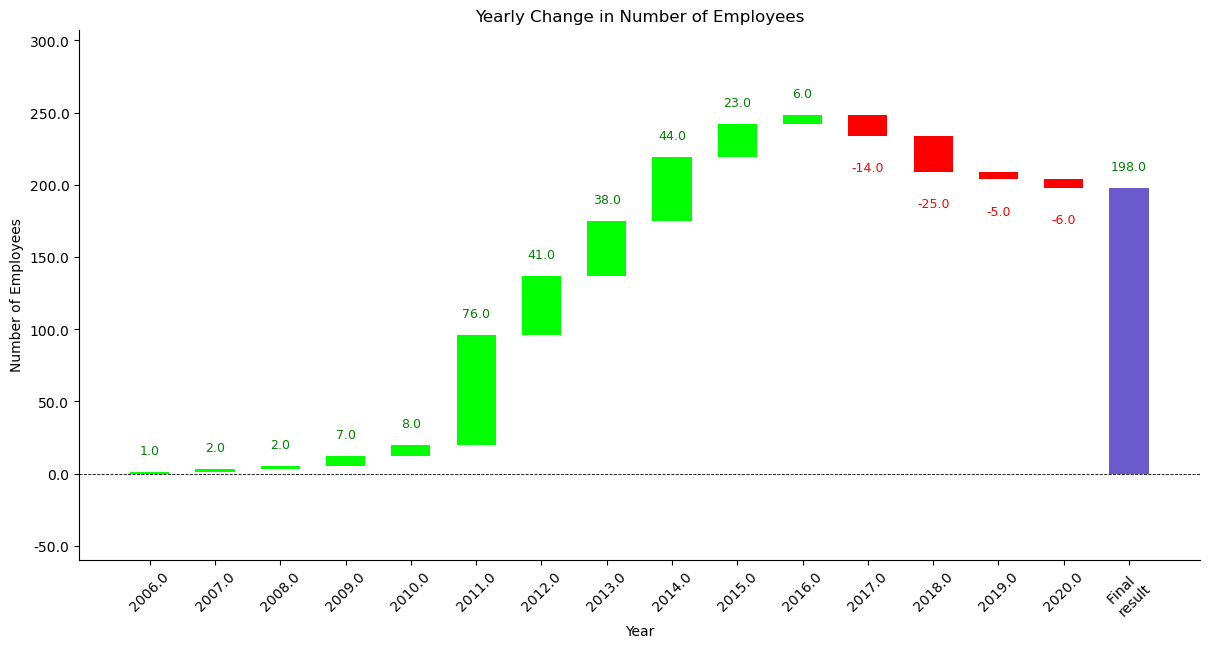

In [225]:
import waterfall_chart

waterfall_chart.plot(df_hiringresign['Year'], df_hiringresign['YearlyChange'], 
                     rotation_value=0,                      
                     net_label='Final \nresult',
                     blue_color='slateblue', 
                     green_color='lime', 
                     red_color='red')
plt.title('Yearly Change in Number of Employees')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Number of Employees')
sns.despine()
plt.show()

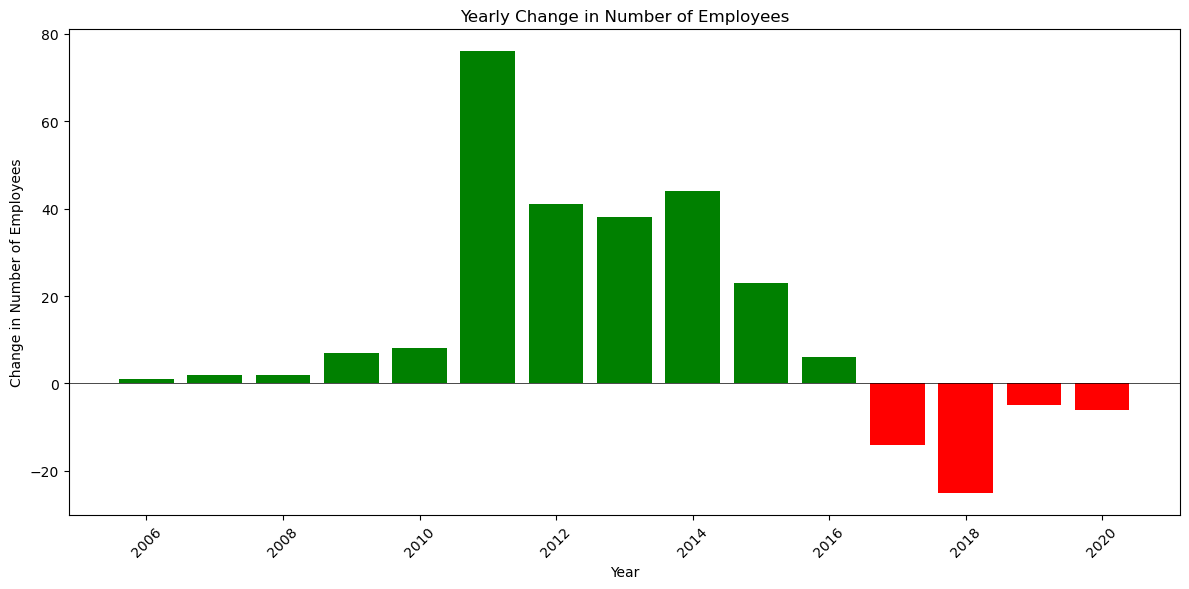

In [226]:
plt.figure(figsize=(12, 6))
plt.bar(df_hiringresign['Year'], df_hiringresign['YearlyChange'], color=['g' if x >= 0 else 'r' for x in df_hiringresign['YearlyChange']])
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.title('Yearly Change in Number of Employees')
plt.xlabel('Year')
plt.ylabel('Change in Number of Employees')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Resign Reason Analysis for Employee Attrition Management Strategy

Tahapan Pengerjaan

1. Buatlah dua data frame terpisah yang masing-masing dibentuk dari hasil agregasi jumlah employee berdasarkan pekerjaan, yang sudah resign maupun yang belum resign (Hint: Gunakan filter value pada data frame agar memisahkan dua data frame tentang sudah resign atau belum) (done)

2. Gabungkan kedua dataframe tersebut berdasarkan key Pekerjaan (Hint: Gunakan outer join) (done)

3. Buatlah dua kolom baru dari tabel baru tersebut, yaitu jumlah employee dan persentase jumlah employee yang masih ada (belum resign) (Hint: Kolom jumlah employee didapatkan dengan menambahkan total employee yang masih ada dan sudah resign, sedangkan yang persentase employee yang masih ada, cukup membagi existing employee dengan total employee) (done)

4. Buatlah plot yang menampilkan persentase employee yang masih ada berdasarkan divisi pekerjaannya (Hint: Perhatikan jenis plot yang digunakan) (done)

5. Divisi yang memiliki tingkat resign tertinggi, buatlah tabel agregasi untuk menghitung jumlah employee yang resign berdasarkan Jenjang Karir, Performa Karyawan, dan Alasan Resign (Hint: Pastikan yang memiliki tingkat resign tertinggi ini sudah tepat) (done)

6. Buatlah plot yang menampilkan tabel agregasi pada tahap sebelumnya (Hint: Perhatikan jenis plot yang digunakan) (done)

7. Tuliskan interpretasi dan rekomendasi terhadap hasil plot pada langkah sebelumnya (Hint: Perhatikan apa yang menyebabkan divisi tersebut banyak yang resign, langkah apa yang perlu dilakukan manajemen agar tidak terjadi lagi hal yang seperti itu)

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   StatusPernikahan                    287 non-null    object 
 1   JenisKelamin                        287 non-null    object 
 2   StatusKepegawaian                   287 non-null    object 
 3   Pekerjaan                           287 non-null    object 
 4   JenjangKarir                        287 non-null    object 
 5   PerformancePegawai                  287 non-null    object 
 6   AsalDaerah                          287 non-null    object 
 7   HiringPlatform                      287 non-null    object 
 8   SkorSurveyEngagement                287 non-null    int64  
 9   SkorKepuasanPegawai                 287 non-null    int64  
 10  JumlahKeikutsertaanProjek           287 non-null    int64  
 11  JumlahKeterlambatanSebulanTerakhir  287 non-n

In [228]:
df_resigned = df[df['TanggalResign'] != '-']
df_current = df[df['TanggalResign'] == '-']
resigned_by_job = df_resigned.groupby('Pekerjaan').size().reset_index(name='Count')
resigned_by_job = resigned_by_job.sort_values('Count',ascending=True)
current_by_job = df_current.groupby('Pekerjaan').size().reset_index(name='Count')
current_by_job = current_by_job.sort_values('Count',ascending=True)


In [231]:
merged_by_job = pd.merge(resigned_by_job, current_by_job,on='Pekerjaan', how='outer')
merged_by_job.columns = ['Pekerjaan','CountResigned','CountCurrent']
merged_by_job['CountResigned'] = merged_by_job['CountResigned'].fillna(0)

In [287]:
merged_by_job['TotalEmployees'] = merged_by_job['CountResigned'] + merged_by_job['CountCurrent']
merged_by_job['PercentageCurrent'] = (merged_by_job['CountCurrent']/merged_by_job['TotalEmployees'])*100
merged_by_job['PercentageResigned'] = (merged_by_job['CountResigned']/merged_by_job['TotalEmployees'])*100
merged_by_job = merged_by_job.sort_values('PercentageCurrent',ascending=True)
merged_by_job

,Pekerjaan,CountResigned,CountCurrent,TotalEmployees,PercentageCurrent,PercentageResigned
0,Data Analyst,8.0,8,16.0,50.000000,50.000000
12,Software Engineer (Front End),28.0,44,72.0,61.111111,38.888889
5,Product Design (UI & UX),9.0,15,24.0,62.500000,37.500000
7,Product Manager,6.0,11,17.0,64.705882,35.294118
1,Data Engineer,3.0,7,10.0,70.000000,30.000000
10,Software Engineer (Android),7.0,17,24.0,70.833333,29.166667
11,Software Engineer (Back End),28.0,81,109.0,74.311927,25.688073
2,DevOps Engineer,0.0,3,3.0,100.000000,0.000000
3,Digital Product Manager,0.0,2,2.0,100.000000,0.000000
4,Machine Learning Engineer,0.0,2,2.0,100.000000,0.000000


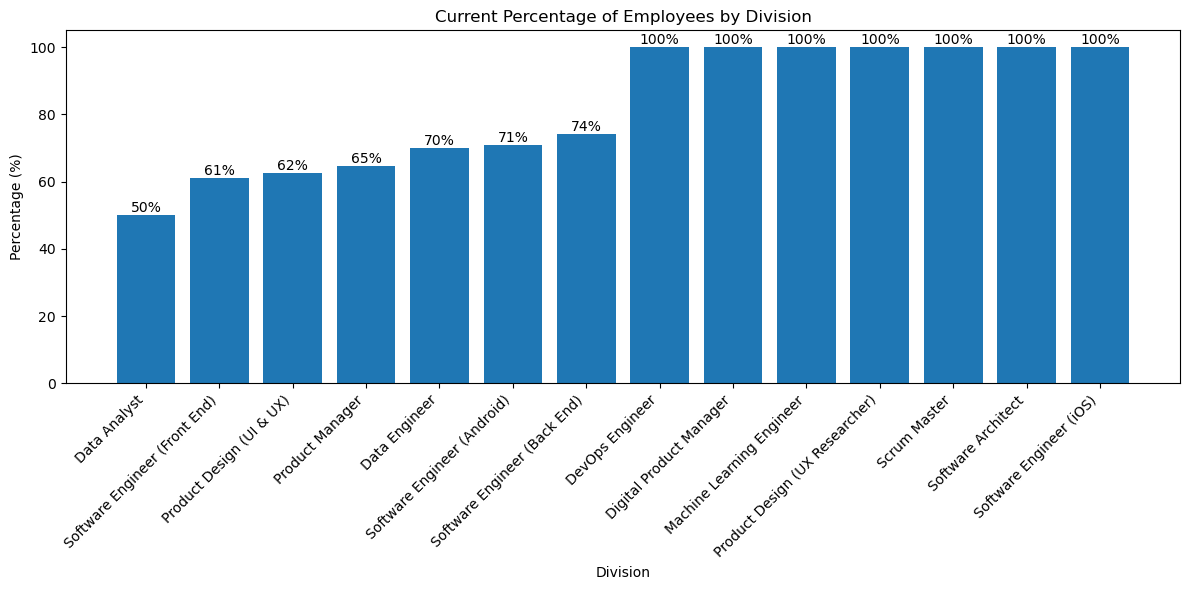

In [242]:
fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(merged_by_job['Pekerjaan'], merged_by_job['PercentageCurrent'])

plt.title('Current Percentage of Employees by Division')
plt.xlabel('Division')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{round(height)}%',
            ha='center', va='bottom')
    
plt.tight_layout()
plt.show()

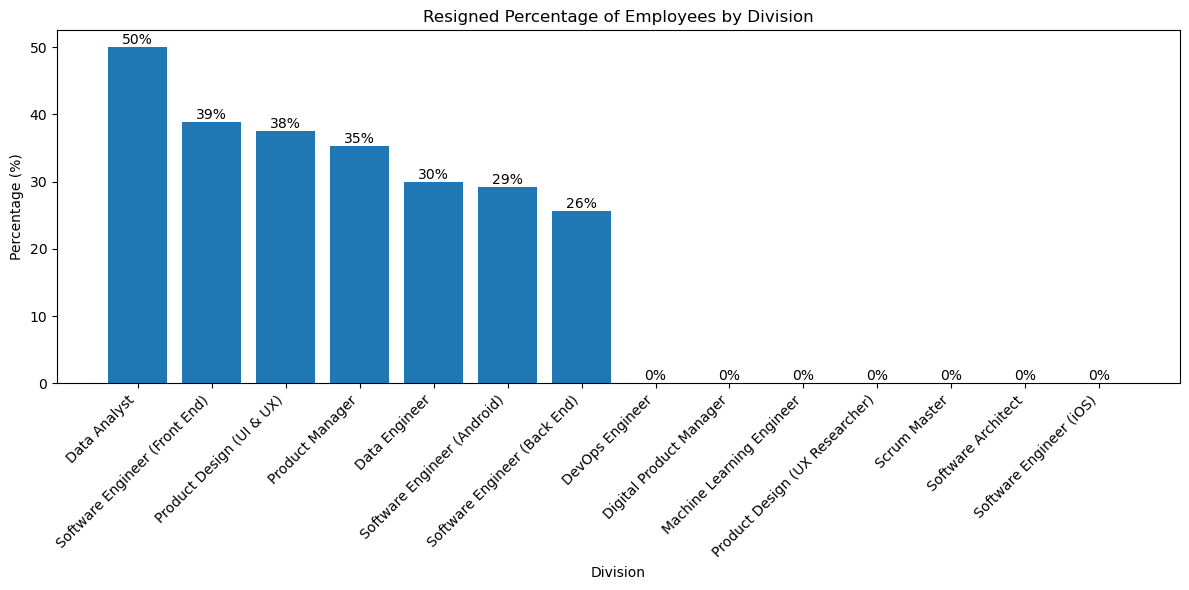

In [247]:
fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(merged_by_job['Pekerjaan'], merged_by_job['PercentageResigned'])

plt.title('Resigned Percentage of Employees by Division')
plt.xlabel('Division')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{round(height)}%',
            ha='center', va='bottom')
    
plt.tight_layout()
plt.show()

- Data Analyst is seen to be having the highest turnover, further analysis is required.

In [248]:
df_resigned_data_analyst = df_resigned[df_resigned['Pekerjaan'] == 'Data Analyst']
df_resigned_data_analyst

,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,...,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,YearHiring,YearResign
1,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4,...,Sarjana,yes,1,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16,2014,2018.0
18,Bercerai,Wanita,FullTime,Data Analyst,Freshgraduate_program,Sangat_bagus,Jakarta Pusat,Diversity_Job_Fair,3,4,...,Sarjana,yes,1,internal_conflict,1968-05-30,2012-04-02,2017-02-05,2017-09-12,2012,2017.0
86,Menikah,Wanita,Outsource,Data Analyst,Freshgraduate_program,Sangat_bagus,Jakarta Timur,Indeed,3,5,...,Sarjana,yes,0,toxic_culture,1987-06-14,2016-10-02,2020-01-08,2017-3-15,2016,2017.0
102,Menikah,Pria,Outsource,Data Analyst,Freshgraduate_program,Sangat_bagus,Jakarta Barat,Google_Search,3,3,...,Sarjana,yes,0,toxic_culture,1984-05-09,2012-04-02,2014-2-20,2018-06-08,2012,2018.0
106,Lainnya,Wanita,FullTime,Data Analyst,Freshgraduate_program,Bagus,Jakarta Barat,CareerBuilder,4,3,...,Sarjana,yes,0,toxic_culture,1987-01-07,2013-01-07,2020-1-30,2014-8-19,2013,2014.0
108,Belum_menikah,Wanita,FullTime,Data Analyst,Freshgraduate_program,Biasa,Jakarta Timur,CareerBuilder,4,4,...,Sarjana,yes,0,toxic_culture,1976-09-22,2015-3-30,2020-1-21,2014-8-19,2015,2014.0
233,Belum_menikah,Wanita,FullTime,Data Analyst,Freshgraduate_program,Sangat_bagus,Jakarta Utara,Diversity_Job_Fair,4,3,...,Magister,yes,0,toxic_culture,1970-02-11,2009-07-06,2020-1-25,2015-06-05,2009,2015.0
239,Belum_menikah,Wanita,Outsource,Data Analyst,Freshgraduate_program,Biasa,Jakarta Utara,Google_Search,4,4,...,Magister,yes,0,internal_conflict,1989-09-08,2011-07-11,2017-02-01,2017-6-25,2011,2017.0


5. Divisi yang memiliki tingkat resign tertinggi, buatlah tabel agregasi untuk menghitung jumlah employee yang resign berdasarkan Jenjang Karir, Performa Karyawan, dan Alasan Resign (Hint: Pastikan yang memiliki tingkat resign tertinggi ini sudah tepat)

In [273]:
df_resigned_data_analyst_agg = df_resigned_data_analyst.groupby(['JenjangKarir', 'PerformancePegawai','AlasanResign']).size().reset_index(name='Count')
df_resigned_data_analyst_agg = df_resigned_data_analyst_agg.sort_values('Count', ascending=False)
df_resigned_data_analyst_agg = df_resigned_data_analyst_agg.replace(['Freshgraduate_program','Sangat_bagus','Sangat_kurang','toxic_culture','internal_conflict'],
           ['Freshgraduate','Sangat bagus','Sangat kurang','toxic culture','internal conflict'])
df_resigned_data_analyst_agg

,JenjangKarir,PerformancePegawai,AlasanResign,Count
4,Freshgraduate,Sangat bagus,toxic culture,3
0,Freshgraduate,Bagus,toxic culture,1
1,Freshgraduate,Biasa,internal conflict,1
2,Freshgraduate,Biasa,toxic culture,1
3,Freshgraduate,Sangat bagus,internal conflict,1
5,Freshgraduate,Sangat kurang,toxic culture,1


In [286]:
import plotly.express as px

fig = px.sunburst(df_resigned_data_analyst_agg, path=['JenjangKarir', 'PerformancePegawai','AlasanResign'], values='Count')
fig.update_layout(
    title="Resignation Reason of Data Analysts",
    title_x=0.5,  # Center the title horizontally
    title_yref="container",  # Reference the container holding the plot
    title_y=0.95  # Position the title slightly above the plot
)
fig.show()